In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
credit_df = pd.read_excel("TaiwanCreditDefaults.xls",header=1)

In [3]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#checking for empty data-points (Null values)
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
credit_df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

**Exploratory Data analysis**

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

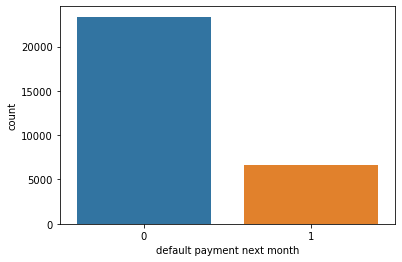

In [12]:
#CountPlot for deafult payment next month
sns.countplot(credit_df['default payment next month'])

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

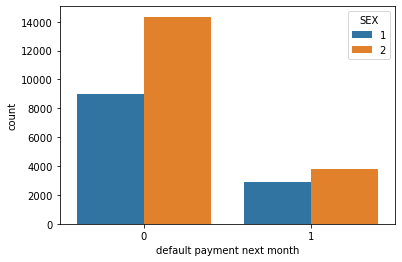

In [14]:
#CountPlot for deafult payment next month according to sex
sns.countplot(credit_df['default payment next month'],hue=credit_df['SEX'])
#Here Sex Male = 1, Female = 2

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

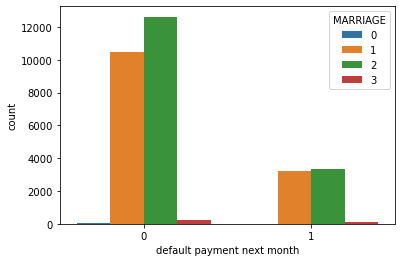

In [15]:
#CountPlot for deafult payment next month according to Marital status
sns.countplot(credit_df['default payment next month'],hue=credit_df['MARRIAGE'])
#Here Marriage; 1 = Married, 2 = single, 3 = others

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

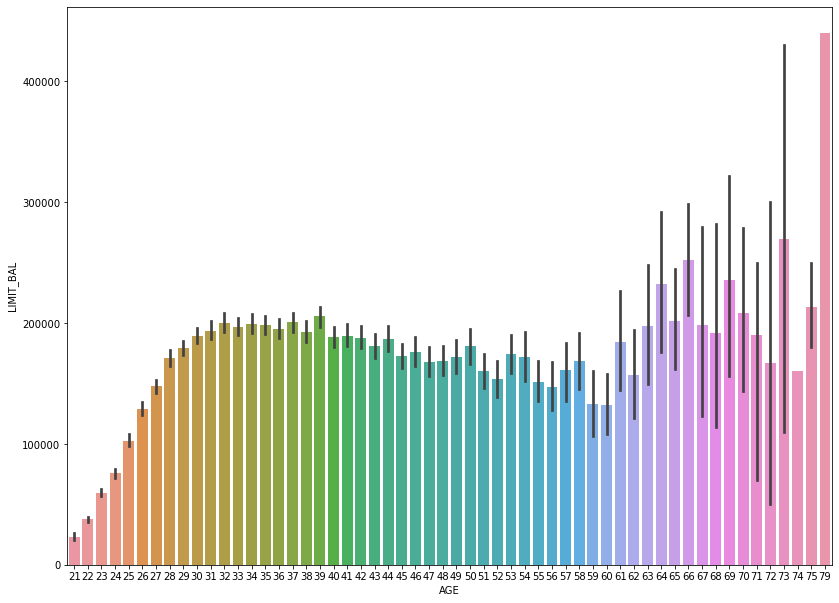

In [17]:
#Plotting BarPlot between Age and Credit Limit
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(credit_df['AGE'],credit_df['LIMIT_BAL'])

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

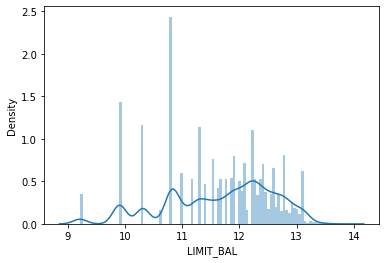

In [19]:
#Distribution Plot to analyse how the Credit Limit (LIMIT_BAL) is distributed
sns.distplot(np.log(credit_df["LIMIT_BAL"]), bins=100)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

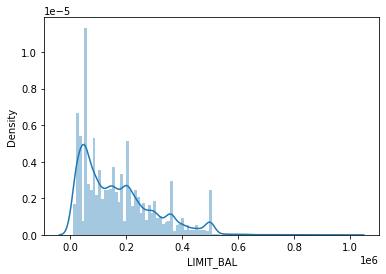

In [27]:
sns.distplot(credit_df["LIMIT_BAL"],bins=100, norm_hist=True)

<AxesSubplot:>

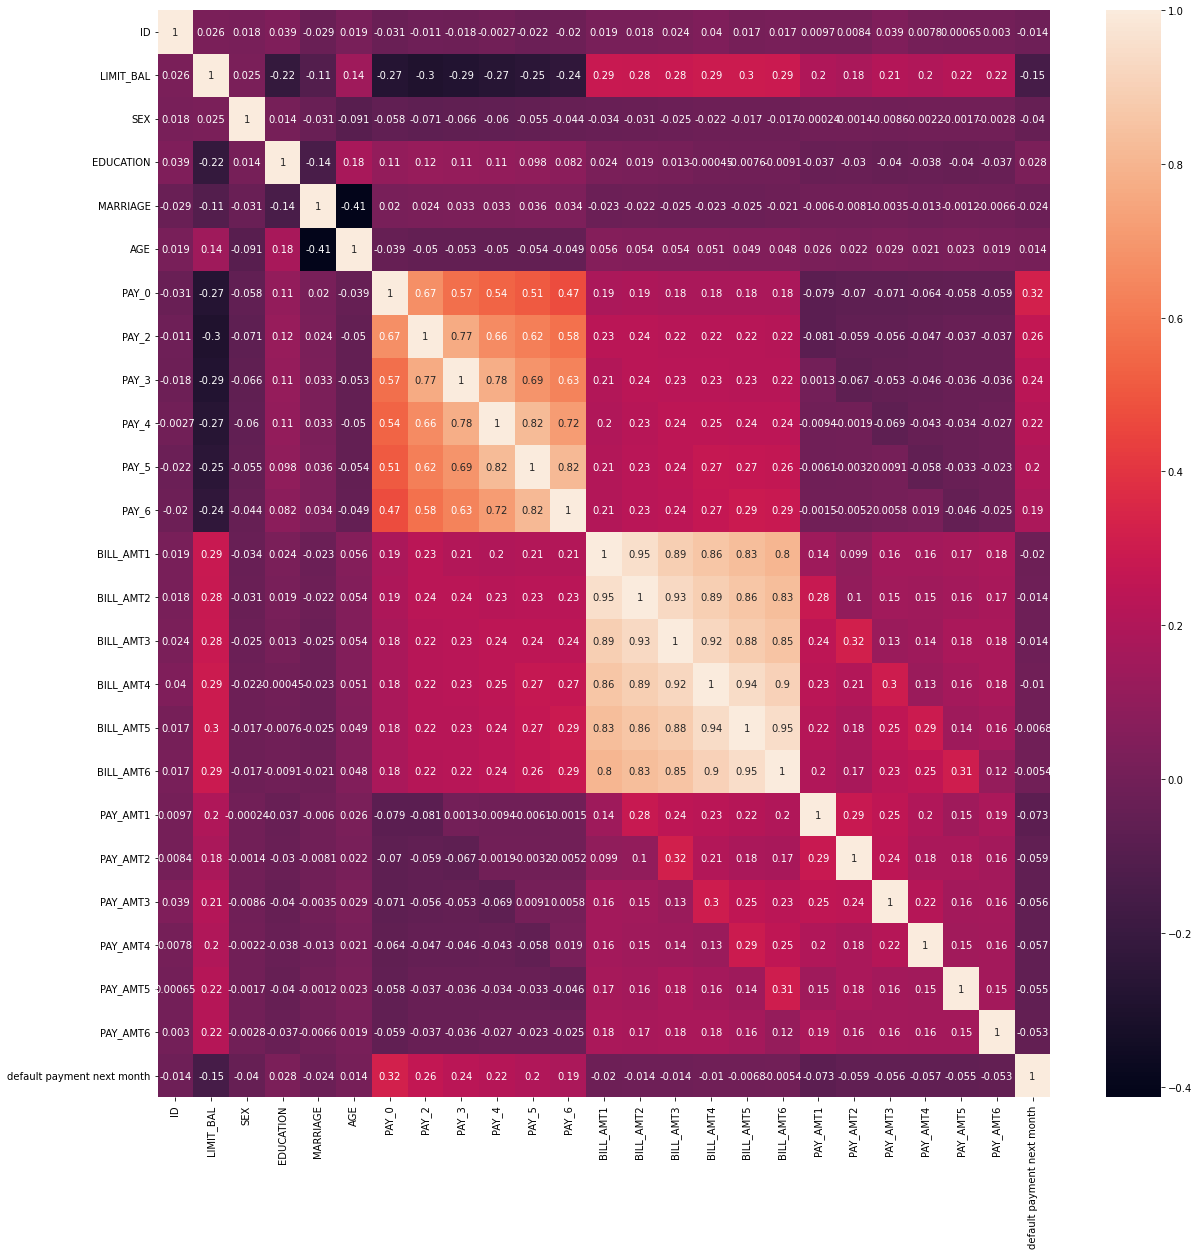

In [28]:
#Correlation HeatMap
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(),annot=True)

In [29]:
X= credit_df.drop('default payment next month',axis=1)
Y=credit_df['default payment next month']

<AxesSubplot:title={'center':'Correalation with response variable'}>

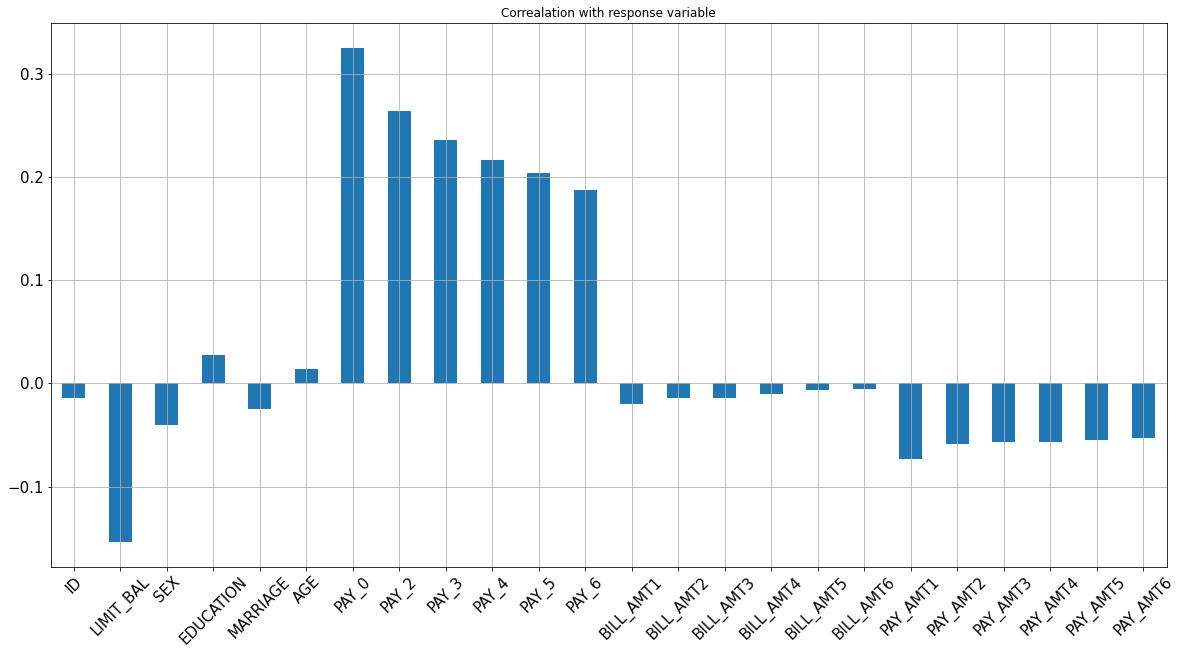

In [32]:
X.corrwith(Y).plot.bar(figsize=(20,10), title="Correalation with response variable",
                                        fontsize=15,rot=45,grid=True)

In [34]:
#Dropping Attributes having low correlation with 'Default Payment Next month'
X_cleaned = X.drop(['ID','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_cleaned = sc.fit_transform(X_cleaned)

In [79]:
Y = np.array(Y)
X.shape,X_cleaned.shape, Y.shape

((30000, 24), (30000, 17), (30000,))

In [75]:
#Splitting Data
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_cleaned,Y, test_size= 0.2)

In [56]:
#Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
#Decision Tree

clf_tree=DecisionTreeClassifier()
#clf=GridSearchCV(clf_tree,parameters)
clf_tree.fit(x_train,y_train)
y_pred=clf_tree.predict(x_test)

<AxesSubplot:>

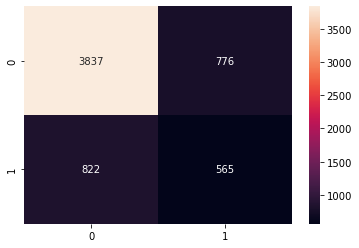

In [77]:
#Predicting Y values
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [78]:
ac=accuracy_score(y_pred,y_test)
print("Accuracy : ",ac)

Accuracy :  0.7336666666666667


In [80]:
#Decision Tree with Grid Search
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

Accuracy :  0.8225


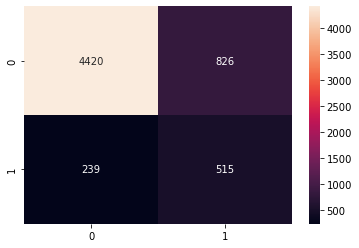

In [81]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
ac=accuracy_score(y_pred,y_test)
print("Accuracy : ",ac)

In [82]:
#Random Forest Classifier
alg1=RandomForestClassifier()
alg1.fit(x_train,y_train)
y_pred1=alg1.predict(x_test)

Accuracy :  0.8225


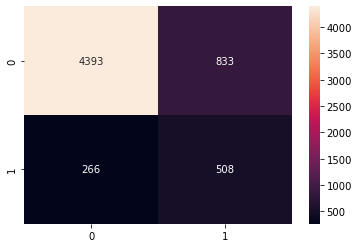

In [83]:
cm=confusion_matrix(y_pred1,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print("Accuracy : ",ac)

**Analysis Conclusion**
From EDA it can be concluded that the factors contributing the most to "default payment" not being made are the "limited balance" given as credit,sex,education, the repayment status and the amount of repayment.

It was also observed that female members are relatively more susceptible to not making default payment, same with married individuals.

Credit Assignment was rather random after the age of 60. Prior to this the credit assignment seems to follow an increasing trend until the age of 39 where it seems to reach the local maxima and follows a descent. After 60, it becomes rather random. This is why age, was not chosen as a deciding factor.

After EDA, we used Machine Learning Model to fit on data and make our predictions.

It can be clearly seen that the Random Forest model works best because it has got 82.25% accuracy.

This model is ready to be used by Credit Card companies for predicting whether the default payment will be made or not.